# Tomato leaf disease detection

## 1. About Dataset

This dataset contains images of tomato leaves affected by different types of diseases. The goal is to classify the health condition of the tomato leaves. The dataset includes the following categories:

- **Tomato Mosaic Virus**
- **Target Spot**
- **Bacterial Spot**
- **Tomato Yellow Leaf Curl Virus**
- **Late Blight**
- **Leaf Mold**
- **Early Blight**
- **Spider Mites (Two-spotted Spider Mite)**
- **Tomato (Healthy)**
- **Septoria Leaf Spot**

---

A **Convolutional Neural Network (CNN)** is ideal for this dataset because:

1. **Image Classification**: CNNs are highly effective in processing images by automatically learning features such as edges, shapes, and patterns, which are crucial in distinguishing between different tomato leaf diseases.
   
2. **Disease Detection**: By training the CNN on labeled images, it can learn to differentiate between healthy leaves and those affected by various diseases, allowing for accurate and automated diagnosis.

3. **Feature Extraction**: CNNs can extract complex features related to color, texture, and patterns that distinguish different diseases (e.g., spots, discoloration) which are challenging for manual inspection.

4. **Real-time Application**: A well-trained CNN can be used in real-time to assist farmers in identifying diseases early, leading to timely treatment and reduced crop loss.


## 2. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.callbacks import EarlyStopping

2024-09-17 19:27:29.303265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 19:27:29.478744: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 19:27:29.530095: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 19:27:29.885053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 19:27:31.412053: W tensorflow/compiler/tf2

In [2]:
image_folder_train = './data/tomato/train/'
image_folder_test = './data/tomato/val/'

In [3]:
batch_size = 32
img_height = 256
img_width = 256

## 3. Dataset Preparation and Visualization

In [5]:
test_set = keras.preprocessing.image_dataset_from_directory(
    image_folder_test,
    subset = 'training',
    validation_split=0.2,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1000 files belonging to 10 classes.
Using 800 files for training.


In [6]:
train_set = keras.preprocessing.image_dataset_from_directory(
    image_folder_train,
    subset = 'training',
    validation_split=0.2,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 10000 files belonging to 10 classes.
Using 8000 files for training.


In [7]:
val_set = keras.preprocessing.image_dataset_from_directory(
    image_folder_train,
    subset = 'validation',
    validation_split=0.2,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


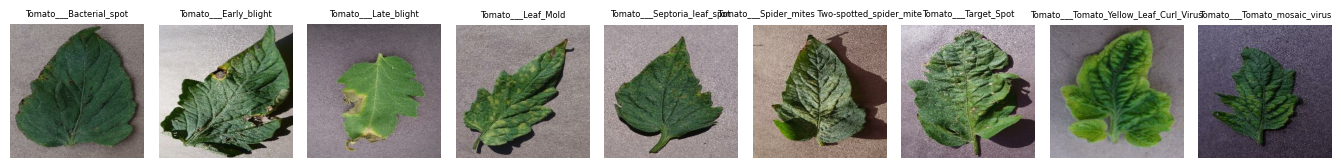

In [7]:
class_names = train_set.class_names

image_batch, label_batch = next(iter(train_set))

def plot_images(images, labels, class_names, num_images_per_class=1):
    num_classes = len(class_names)
    plt.figure(figsize=(15, 10))

    for class_index in range(num_classes):
        class_images = images[labels == class_index][:num_images_per_class]
        for i, img in enumerate(class_images):
            plt.subplot(num_images_per_class,num_classes, class_index * num_images_per_class + i + 1)
            plt.imshow(img.numpy().astype("uint8"))
            plt.title(class_names[class_index],fontdict={'fontsize':6})
            plt.axis("off")
    
    plt.tight_layout()
    plt.show()
plot_images(image_batch, label_batch, class_names)

## 4. Convolutional Neural Network (CNN) Model

/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 252, 252, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │     2,540,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,541,386 (9.69 MB)

 Trainable params: 2,541,386 (9.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1726563914.959816   34196 service.cc:146] XLA service 0x7f6274003540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726563914.959867   34196 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-09-17 11:05:15.003896: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-17 11:05:15.165488: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  7/250 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0705 - loss: 30.7646

I0000 00:00:1726563917.364266   34196 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.2119 - loss: 7.3157 - val_accuracy: 0.6770 - val_loss: 0.9998
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7491 - loss: 0.8140 - val_accuracy: 0.6935 - val_loss: 0.8546
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8287 - loss: 0.5537 - val_accuracy: 0.7380 - val_loss: 0.7775
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8866 - loss: 0.3964 - val_accuracy: 0.7490 - val_loss: 0.7665
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9216 - loss: 0.2932 - val_accuracy: 0.7705 - val_loss: 0.6882
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9492 - loss: 0.2138 - val_accuracy: 0.7875 - val_loss: 0.6063
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9726 - loss: 0.1502 - val_accuracy: 0.7985 - val_loss: 0.5955
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9870 - loss: 0.1058 - val_accuracy: 0.78

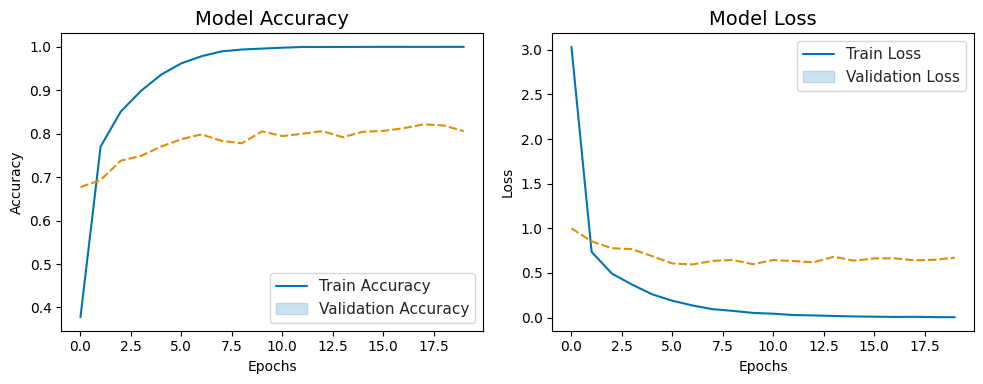

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7977 - loss: 0.7834
Test accuracy: 0.7862499952316284


In [8]:
model_1 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(16, 5, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(10,activation='softmax')
])

model_1.compile(optimizer=optimizers.Adamax(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Epoch = 20
callback = EarlyStopping(monitor = 'val_accuracy', patience=8)
    
history_1 = model_1.fit(train_set, epochs=Epoch, verbose=1, callbacks=callback,validation_data=val_set)

history_df = pd.DataFrame(history_1.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_1.evaluate(test_set)
print('Test accuracy:', test_acc)

#### Interpretation

    Initial Learning
The model shows a strong improvement in accuracy during the early epochs as it begins learning the key features of the dataset.

    Overfitting
As training progresses, the model achieves near-perfect accuracy on the training set but struggles to push past 80% accuracy on the validation and test sets. This suggests **overfitting**, where the model is memorizing the training data rather than generalizing well to unseen data.

    Final Performance
The final test accuracy of **79.27%** indicates that the model performs reasonably well but could benefit from regularization techniques (e.g., dropout, data augmentation) to improve generalization and reduce overfitting. The validation and test losses suggest that the model still has room for improvement in handling unseen data more effectively.

## 5. Adding Augmentation and Dropout

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
  ]
)

/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_22 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,394 (1.04 MB)

 Trainable params: 272,394 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.1585 - loss: 2.1805 - val_accuracy: 0.4150 - val_loss: 1.6037
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.4329 - loss: 1.5479 - val_accuracy: 0.5495 - val_loss: 1.2632
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.5457 - loss: 1.2413 - val_accuracy: 0.6185 - val_loss: 1.0669
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.6184 - loss: 1.0547 - val_accuracy: 0.6910 - val_loss: 0.8875
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.6639 - loss: 0.9219 - val_accuracy: 0.6790 - val_loss: 0.9137
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.6917 - loss: 0.8372 - val_accuracy: 0.7340 - val_loss: 0.7538
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.7367 - loss: 0.7374 - val_accuracy: 0.7485 - val_loss: 0.7026
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.7592 - loss: 0.6967 - 

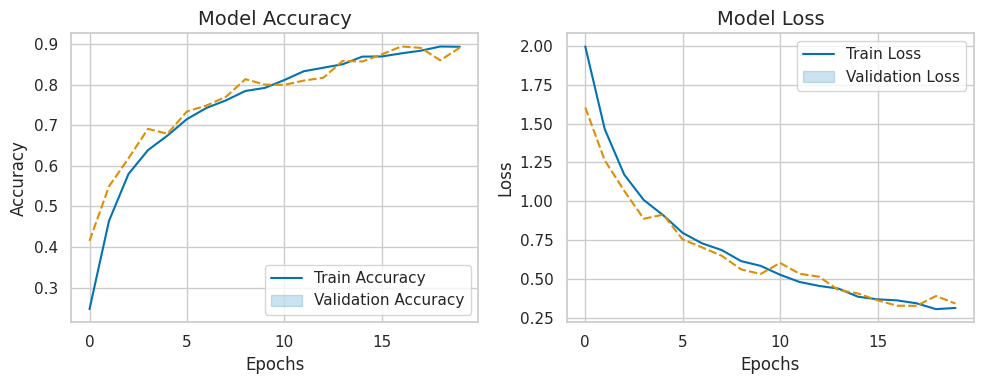

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8423 - loss: 0.4503
Test accuracy: 0.8550000190734863


In [40]:
model_2 = Sequential([

    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model_2.compile(optimizer=optimizers.Adamax(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.summary()

Epoch = 20
callback = EarlyStopping(monitor = 'val_accuracy', patience=5)
    
history_2 = model_2.fit(train_set, epochs=Epoch, verbose=1, callbacks=callback,validation_data=val_set)

history_df = pd.DataFrame(history_2.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_2.evaluate(test_set)
print('Test accuracy:', test_acc)

/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_23 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862,474 (3.29 MB)

 Trainable params: 862,474 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.1856 - loss: 2.1175 - val_accuracy: 0.4490 - val_loss: 1.4956
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.4601 - loss: 1.4361 - val_accuracy: 0.4710 - val_loss: 1.3897
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.5548 - loss: 1.2035 - val_accuracy: 0.6735 - val_loss: 0.8839
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.6641 - loss: 0.9078 - val_accuracy: 0.7080 - val_loss: 0.7520
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7357 - loss: 0.7286 - val_accuracy: 0.7745 - val_loss: 0.6158
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7901 - loss: 0.5908 - val_accuracy: 0.8340 - val_loss: 0.5021
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.8134 - loss: 0.5209 - val_accuracy: 0.8425 - val_loss: 0.4403
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.8277 - loss: 0.4872 - 

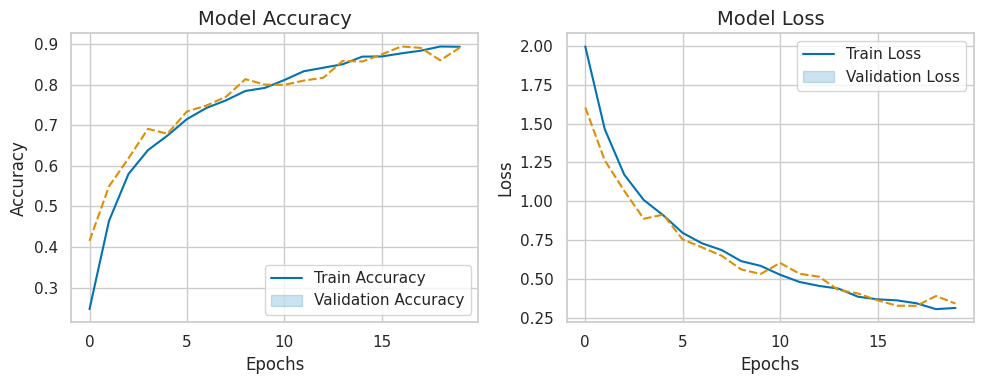

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8890 - loss: 0.2984
Test accuracy: 0.887499988079071


In [41]:
model_3 = Sequential([

    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model_3.compile(optimizer=optimizers.Adamax(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_3.summary()

Epoch = 20
callback = EarlyStopping(monitor = 'val_accuracy', patience=5)
    
history_3 = model_3.fit(train_set, epochs=Epoch, verbose=1, callbacks=callback,validation_data=val_set)

history_df = pd.DataFrame(history_2.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_3.evaluate(test_set)
print('Test accuracy:', test_acc)

/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_34 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 126, 126, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_106               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_107               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_108               │ (None, 14, 14, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 12, 12, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_109               │ (None, 6, 6, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 2, 2, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_22     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 873,258 (3.33 MB)

 Trainable params: 873,258 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.1653 - loss: 2.1690 - val_accuracy: 0.3085 - val_loss: 1.8569
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.4219 - loss: 1.5982 - val_accuracy: 0.6300 - val_loss: 1.1007
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.6343 - loss: 1.0544 - val_accuracy: 0.6750 - val_loss: 0.9245
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.6801 - loss: 0.8842 - val_accuracy: 0.7380 - val_loss: 0.7643
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7403 - loss: 0.7284 - val_accuracy: 0.7735 - val_loss: 0.6649
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7712 - loss: 0.6322 - val_accuracy: 0.7935 - val_loss: 0.6121
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8175 - loss: 0.5158 - val_accuracy: 0.7700 - val_loss: 0.6652
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8325 - loss: 0.4743 - 

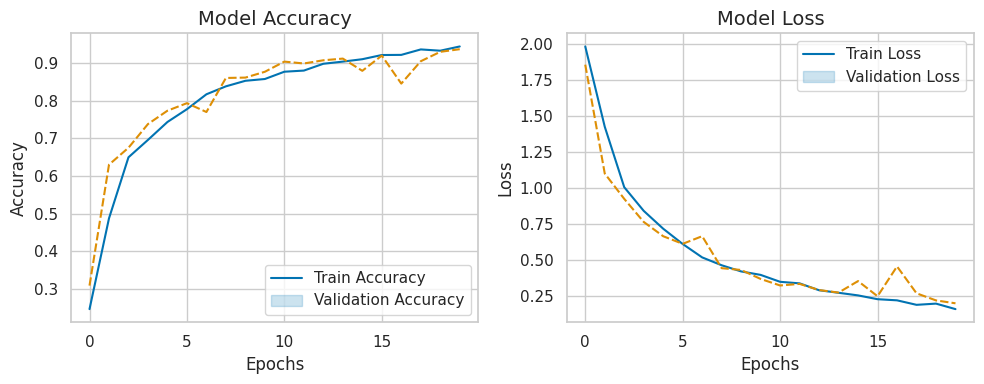

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9308 - loss: 0.2121
Test accuracy: 0.918749988079071


In [53]:
model_4 = Sequential([

    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(32, 5, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(256,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10,activation='softmax')
])

model_4.compile(optimizer=optimizers.Adamax(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4.summary()

Epoch = 20
callback = EarlyStopping(monitor = 'val_accuracy', patience=5)
    
history_4 = model_4.fit(train_set, epochs=Epoch, verbose=1, callbacks=callback,validation_data=val_set)

history_df = pd.DataFrame(history_4.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_4.evaluate(test_set)
print('Test accuracy:', test_acc)

## 6. Overall Comparison:

- **Training Accuracy**: 
  - The first model overfitted by reaching 100% accuracy too quickly.
  - The last model shows a more natural improvement, reaching **94.39%**, which may help prevent overfitting.

- **Validation and Test Accuracy**: 
  - The last model significantly outperforms the previous ones on both validation and test sets, showing better generalization:
    - **New Model**: 93.70% (validation), 93.08% (test)

- **Training and Validation Loss**: 
  - The last model's validation loss dropped significantly to **0.1989**, indicating better performance in terms of error minimization.

## Conclusion

The last model demonstrates **much better generalization**, with significantly higher validation and test accuracy, and lower loss. While the first model overfitted by focusing too heavily on the training data (reaching 100% accuracy), the new model strikes a **better balance between training and validation**, resulting in **superior performance on unseen data**.
